<a href="https://colab.research.google.com/github/soumeyademil/EDA-Trending-Ytb-Videos/blob/main/EDA_Trending_Ytb_Videos_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download Data 
The first step is to download our data from Kaggle to the drive.

In [23]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We have now to create a new API token from **Kaggle >> Account >> API >> Create New API Token**. A file named 'kaggle.json' will be downloaded. We must upload this file inside the folder '/content/drive/MyDrive/Kaggle'.

In [24]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [25]:
# !kaggle datasets download -d datasnaek/youtube-new

In [26]:
# !unzip \*.zip  && rm *.zip

### Data cleaning

In [27]:
import pandas as pd
import numpy as np
import glob

The dataset is divided into separte .csv files. Each file contains trending youtube videos of a given country, within a certain period.

Let's collect all the data in one dataframe, and add the country code as a column.

In [33]:
ytb_df = pd.DataFrame()

parent_dir = '/content/drive/MyDrive/Kaggle/youtube-new'
for filename in glob.glob(f'{parent_dir}//*.csv'):
  country_code = filename.split('/')[-1][:2]
  print(filename)
  new_df = pd.read_csv(filename, encoding='latin-1')
  new_df['country_code'] = country_code
  ytb_df = ytb_df.append(new_df)

/content/drive/MyDrive/Kaggle/youtube-new/CAvideos.csv
/content/drive/MyDrive/Kaggle/youtube-new/DEvideos.csv
/content/drive/MyDrive/Kaggle/youtube-new/FRvideos.csv
/content/drive/MyDrive/Kaggle/youtube-new/GBvideos.csv
/content/drive/MyDrive/Kaggle/youtube-new/INvideos.csv
/content/drive/MyDrive/Kaggle/youtube-new/JPvideos.csv
/content/drive/MyDrive/Kaggle/youtube-new/KRvideos.csv
/content/drive/MyDrive/Kaggle/youtube-new/MXvideos.csv
/content/drive/MyDrive/Kaggle/youtube-new/RUvideos.csv
/content/drive/MyDrive/Kaggle/youtube-new/USvideos.csv


We can have a general look on the dataframe by displaying some of the first lines.

In [35]:
ytb_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country_code
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


Get some general information about the dataframe.

In [37]:
print(f'The dataset contains {len(ytb_df)} record.')

The dataset contains 375942 record.


In [38]:
ytb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375942 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-nu

In [ ]:
ytb_df['trending_date'] = ytb_df['trending_date'].str.replace('.','/')
ytb_df['trending_date'] = pd.to_datetime(ytb_df['trending_date'], format='%y/%d/%m')

ytb_df['publish_time'] = pd.to_datetime(ytb_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.000Z')
ytb_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In this part, we are getting categories from JSON files. We have a file for each country code, let's check first the differences and similarities between category IDs meaning for all of the countries.

In [48]:
import json
 
category_df = pd.DataFrame()

for filename in glob.glob(f'{parent_dir}//*.json'): 
  with open(filename) as json_file:
    country_code = filename.split('/')[-1][:2]
    json_data = json.load(json_file)
    category_list = json_data['items']
    # print('Categories list length...\n', len(category_list))
    category_dict = {el['id']:el['snippet']['title'] for el in category_list}
    category_dict['country_code'] = country_code
    category_df = category_df.append(category_dict, ignore_index=True)
  
category_df


,1,2,10,15,17,18,19,20,21,22,...,36,37,38,39,40,41,42,43,44,country_code
0,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers,US
1,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers,CA
2,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers,DE
3,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers,FR
4,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers,GB
5,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers,IN
6,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers,JP
7,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers,KR
8,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers,MX
9,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers,RU


In [ ]:
ytb_df.category_id.unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43])

In [ ]:
ytb_df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


### Data exploration
In this section, we will answer the following questions:


*   What is the category that has the biggest number of trending videos within a given period?
*   Is it possible that a trending video has no likes? Has more dislikes than likes?
*   
*   List item







In [ ]:
# cat_df = ytb_df.groupby('category_id').agg({
#     'video_id': 'count',
#     'views': ['min', 'max', 'sum'],
#     'likes': ['min', 'max', 'sum'],
#     'dislikes': ['min', 'max', 'sum'],
#     'trending_date': ['min', 'max'],  # To make sure it's approx the same period of time for all categories
# })

cat_df = ytb_df.groupby('category_id').agg(
    video_count = ('video_id', 'count'),
    
    views_min = ('views', 'min'),
    views_max = ('views', 'max'),
    views_sum = ('views', 'sum'),

    likes_min = ('likes', 'min'),
    likes_max = ('likes', 'max'),
    likes_sum = ('likes', 'sum'),

    dislikes_min = ('dislikes', 'min'),
    dislikes_max = ('dislikes', 'max'),
    dislikes_sum = ('dislikes', 'sum'),

    date_min = ('trending_date', 'min'),
    date_max = ('trending_date', 'max'),  # To make sure it's approx the same period of time for all categories
)

cat_df.reset_index(inplace=True)

cat_df['category_name'] = cat_df['category_id'].apply(lambda id: category_dict[str(id)])
cat_df

,category_id,video_count,views_min,views_max,views_sum,likes_min,likes_max,likes_sum,dislikes_min,dislikes_max,dislikes_sum,date_min,date_max,category_name
0,1,2345,943,54863912,7284156721,0,922355,165997476,0,38082,6075148,2017-11-14,2018-06-14,Film & Animation
1,2,384,2860,25244097,520690717,0,97030,4245656,0,12290,243010,2017-11-14,2018-05-21,Autos & Vehicles
2,10,6472,1591,225211923,40132892190,0,5613827,1416838584,0,343541,51179008,2017-11-14,2018-06-14,Music
3,15,920,3393,6187457,764651989,6,178243,19370702,0,4899,527379,2017-11-14,2018-06-14,Pets & Animals
4,17,2174,658,29090799,4404456673,0,1121217,98621211,0,176903,5133551,2017-11-14,2018-06-14,Sports
5,19,402,789,23932421,343557084,3,42447,4836246,0,9000,340427,2017-11-14,2018-06-14,Travel & Events
6,20,817,1237,16935442,2141218625,2,444203,69038284,0,212976,9184466,2017-11-14,2018-06-14,Gaming
7,22,3210,884,56111957,4917191726,0,2032463,186615999,0,228426,10187901,2017-11-14,2018-06-14,People & Blogs
8,23,3457,1807,29178096,5117426208,6,865679,216346746,0,29865,7230391,2017-11-14,2018-06-14,Comedy
9,24,9964,798,149376127,20604388195,0,3093544,530516491,0,1674420,42987663,2017-11-14,2018-06-14,Entertainment


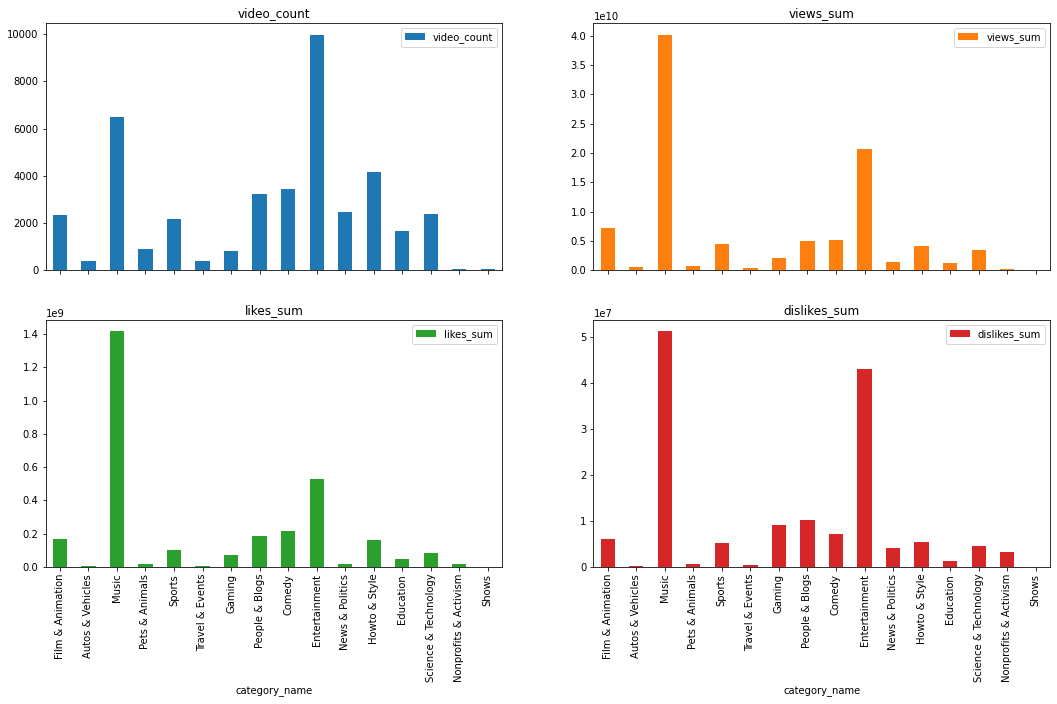

In [ ]:
axes = cat_df.plot.bar(rot=90, subplots=True, layout=(2, 2), x='category_name', y=['video_count', 'views_sum', 'likes_sum', 'dislikes_sum'], figsize=(18, 10))

# axes[0].set_xticklabels(cat_df['category_name'], rotation=90)
# axes[0].set_yticklabels(cat_df['video_count'])
# axes[0].plot()

# axes[1].set_xticklabels(cat_df['category_name'], rotation=90)
# axes[1].set_yticklabels(cat_df['views_sum'])
# axes[1].plot()

In [ ]:
# Get number of channels that appear in our dataframe
trd_channel_set = ytb_df['channel_title'].unique()
len(trd_channel_set)

2207

In [ ]:
# Get frequency (or number of videos) for each channel title
channel_freq = ytb_df.groupby('channel_title').agg(
    videos_number = ('video_id', 'count')
)

channel_freq.sort_values(by='videos_number', ascending=False, inplace=True)
channel_freq.reset_index(inplace=True)
channel_freq.head(10)

,channel_title,videos_number
0,ESPN,203
1,The Tonight Show Starring Jimmy Fallon,197
2,Vox,193
3,Netflix,193
4,TheEllenShow,193
5,The Late Show with Stephen Colbert,187
6,Jimmy Kimmel Live,186
7,Late Night with Seth Meyers,183
8,Screen Junkies,182
9,NBA,181


We'll now see if there is a correlation between variables.

In [ ]:
# Get correlation between views and likes
corr_views_likes = ytb_df['views'].corr(ytb_df['likes'])
corr_views_dislikes = ytb_df['views'].corr(ytb_df['dislikes'])
corr_views_comments = ytb_df['views'].corr(ytb_df['comment_count'])

corr_views_likes.round(3), corr_views_dislikes.round(3), corr_views_comments.round(3)

(0.849, 0.472, 0.618)

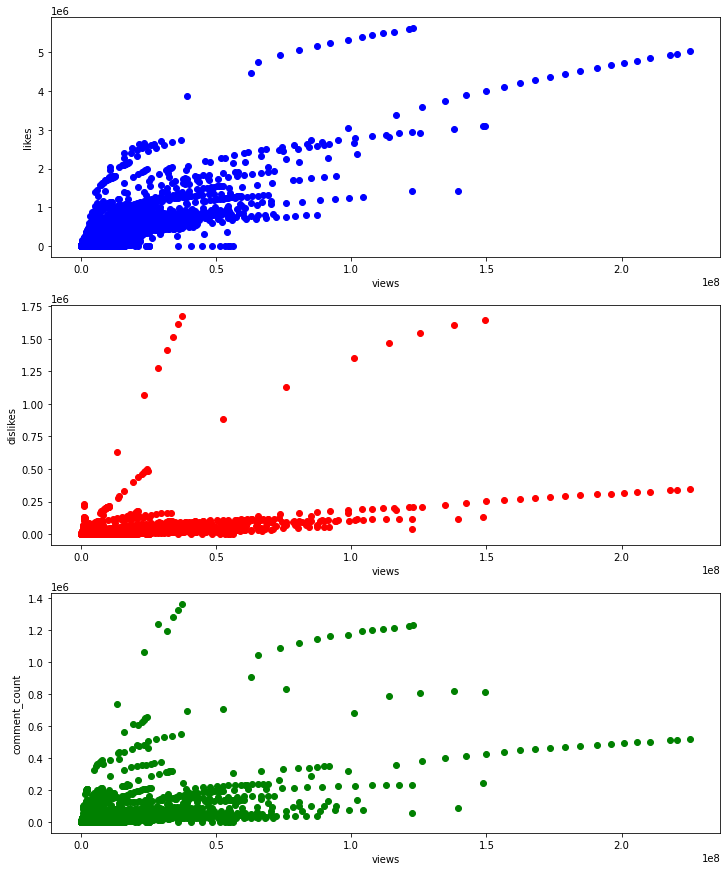

In [ ]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

ax1.scatter(x=ytb_df['views'], y=ytb_df['likes'], c='b')
ax1.set_xlabel("views")
ax1.set_ylabel("likes")

ax2.scatter(x=ytb_df['views'], y=ytb_df['dislikes'], c='r')
ax2.set_xlabel("views")
ax2.set_ylabel("dislikes")

ax3.scatter(x=ytb_df['views'], y=ytb_df['comment_count'], c='g')
ax3.set_xlabel("views")
ax3.set_ylabel("comment_count")

plt.show()

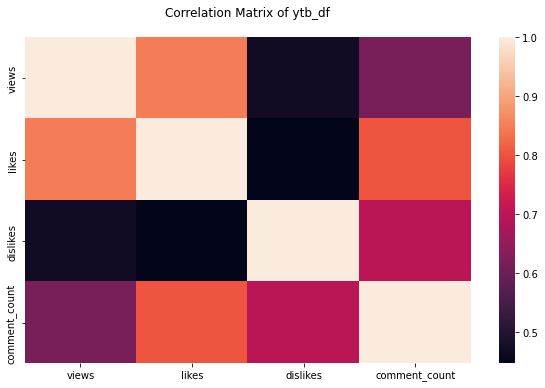

In [ ]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

import seaborn as sns

# calculate the correlation matrix
corr = ytb_df[['views', 'likes', 'dislikes', 'comment_count']].corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(
        corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="rocket"
)
plt.title('Correlation Matrix of ytb_df\n')
plt.show()

The correlation matrix above shows that:

*   There is a high positive correlation between the two variables "views" and "likes". More views means more likes.
* "likes" and "comment_count" are strongly positively correlated, which means that most of people clicking the like button comment the video, and vice versa.
*   There is a weak correlation between "dislikes" and "comment_count".
*   The two columns "views" and "dislikes" are not correlated.
*   There is also no correlation between "likes" and "dislikes".





We can calculate the ratio likes/dislikes for each category..